In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import pandas as pd
import healpy as hp
import time
import warnings
from pixell import reproject
from classy import Class
%matplotlib inline
import s1 
import ST

In [2]:
nside_2048 = 2048
nside_1024 = 1024
nside_0256 = 256

In [3]:
lmax_0256 = 3*nside_0256 - 1 
lmax_1024 = 3*nside_1024 - 1 
lmax_2048 = 3*nside_2048 - 1 

In [221]:
ell_2048 = np.arange(0,lmax_2048+1)
ellsc_2048 = 21600/ell_2048
norm_2048 = ell_2048 * (ell_2048+1) / (2*np.pi)

<ipython-input-221-3509b796c297>:2: RuntimeWarning: divide by zero encountered in true_divide
  ellsc_2048 = 21600/ell_2048


In [4]:
ell_0256 = np.arange(0,lmax_0256+1)
ellsc_0256 = 21600/ell_0256
norm_0256 = ell_0256 * (ell_0256+1) / (2*np.pi)

<ipython-input-4-021124972f74>:2: RuntimeWarning: divide by zero encountered in true_divide
  ellsc_0256 = 21600/ell_0256


In [26]:
alm_size_0256 = int (lmax_0256 + 1 + lmax_0256 * (lmax_0256+1)/2)
alm_size_0256

295296

In [224]:
alm_size_2048 = int (lmax_2048 + 1 + lmax_2048 * (lmax_2048+1)/2)

In [83]:
alm_monopole = np.zeros( alm_size_0256,dtype=np.complex_)
alm_monopole [0] = 100+0j

In [225]:
alm_monopole_2048 = np.zeros( alm_size_2048,dtype=np.complex_)
alm_monopole [0] = 100+0j

In [231]:
map_monopole_2048 = hp.alm2map (alm_monopole_2048 , nside= nside_2048)

In [84]:
map_monopole = hp.alm2map (alm_monopole , nside= nside_0256)

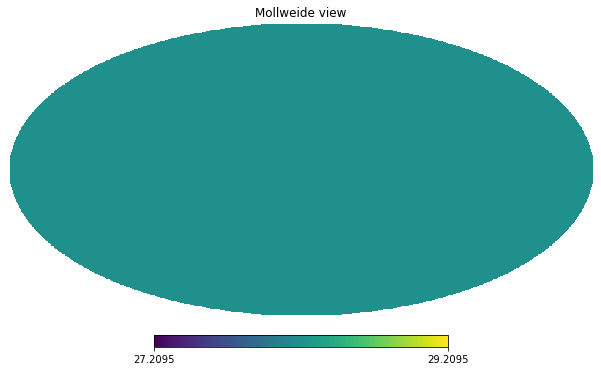

In [85]:
hp.mollview(map_monopole)

In [95]:
cl_monopole = hp.alm2cl (alm_monopole)
#print (cl_monopole)
dl_monopole = cl_monopole *norm_0256

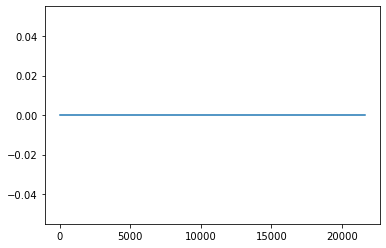

In [206]:
plt.plot(ellsc_0256 , cl_monopole)

In [310]:
alm_dipole = np.zeros(alm_size_0256,dtype=np.complex_)
alm_dipole [1] = 1+0j

In [311]:
map_dipole = hp.alm2map (alm_dipole , nside = nside_0256 )

In [247]:
alm_dipole_2048 = np.zeros( alm_size_2048,dtype=np.complex_)
alm_dipole_2048 [1] = 1+0j

In [248]:
map_dipole_2048 = hp.alm2map (alm_dipole_2048 , nside=nside_2048)

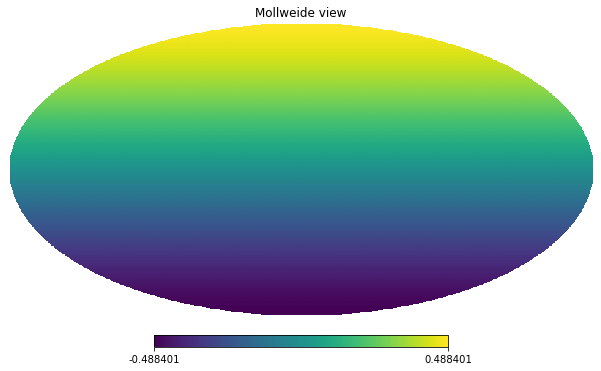

In [312]:
hp.mollview(map_dipole)


In [240]:
cl_dipole = hp.alm2cl (alm_dipole)
#print (cl_monopole)
dl_dipole = cl_dipole *norm_0256

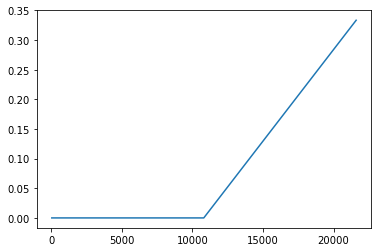

In [316]:
plt.plot(ellsc_0256, cl_dipole)

In [315]:
cl_dipole

array([0.        , 0.33333333, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [193]:
map_dipole_out = hp.synfast (cl_dipole , nside_0256)
alm_dipole_out = hp.map2alm (map_dipole_out)
alm_dipole_out[9]

(1.7106428652021765e-19+0j)

In [116]:
resol_0256 = hp.nside2resol(nside_0256 , arcmin = False )
resol_0256_arcmin = hp.nside2resol(nside_0256 , arcmin=True)

In [226]:
resol_2048 = hp.nside2resol(nside_2048 , arcmin = False )
resol_2048_arcmin = hp.nside2resol(nside_2048 , arcmin=True)

In [227]:
jmax = 10 
theta_bin = 10000

In [324]:
Jf=np.arange(jmax)
scale_0256=2**Jf*((2*resol_0256_arcmin)/0.75)
ell_f_0256 = 360*60/scale_0256

In [228]:
Jf=np.arange(jmax)
scale_2048=2**Jf*((2*resol_2048_arcmin)/0.75)

In [70]:
mor_l_0256 = s1.morlet_arr (resol_0256, jmax , lmax_0256, theta_bin)
gaus_l_0256 = s1.gaus_arr (resol_0256, jmax, lmax_0256, theta_bin)

/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1242: ComplexWarning: Casting complex values to real discards the imaginary part
  window[0] = trapz(beam * p0 * st, theta)
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1243: ComplexWarning: Casting complex values to real discards the imaginary part
  window[1] = trapz(beam * p1 * st, theta)
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1247: ComplexWarning: Casting complex values to real discards the imaginary part
  window[l] = trapz(beam * p2 * st, theta)


In [229]:
mor_l_2048 = s1.morlet_arr (resol_2048, jmax , lmax_2048, theta_bin)
gaus_l_2048 = s1.gaus_arr (resol_2048, jmax, lmax_2048, theta_bin)

/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1242: ComplexWarning: Casting complex values to real discards the imaginary part
  window[0] = trapz(beam * p0 * st, theta)
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1243: ComplexWarning: Casting complex values to real discards the imaginary part
  window[1] = trapz(beam * p1 * st, theta)
/Users/arefe/opt/anaconda3/lib/python3.8/site-packages/healpy/sphtfunc.py:1247: ComplexWarning: Casting complex values to real discards the imaginary part
  window[l] = trapz(beam * p2 * st, theta)


In [89]:
%%time 
s1_monopole_0256 , i1_monopole_0256 = s1.compS1 (map_monopole , mor_l_0256, gaus_l_0256 , resol_0256, jmax, lmax_0256 , nside_0256 )

0
1
2
3
4
5
6
7
8
9
CPU times: user 6.9 s, sys: 210 ms, total: 7.11 s
Wall time: 2.25 s


In [232]:
%%time 
s1_monopole_2048 , i1_monopole_2048 = ST.compS1 (map_monopole_2048 , mor_l_2048, jmax, nside_2048 )

0
1
2
3
4
5
6
7
8
9
CPU times: user 12min 24s, sys: 10.1 s, total: 12min 34s
Wall time: 4min 1s


Text(0, 0.5, '$log(Sl)$')

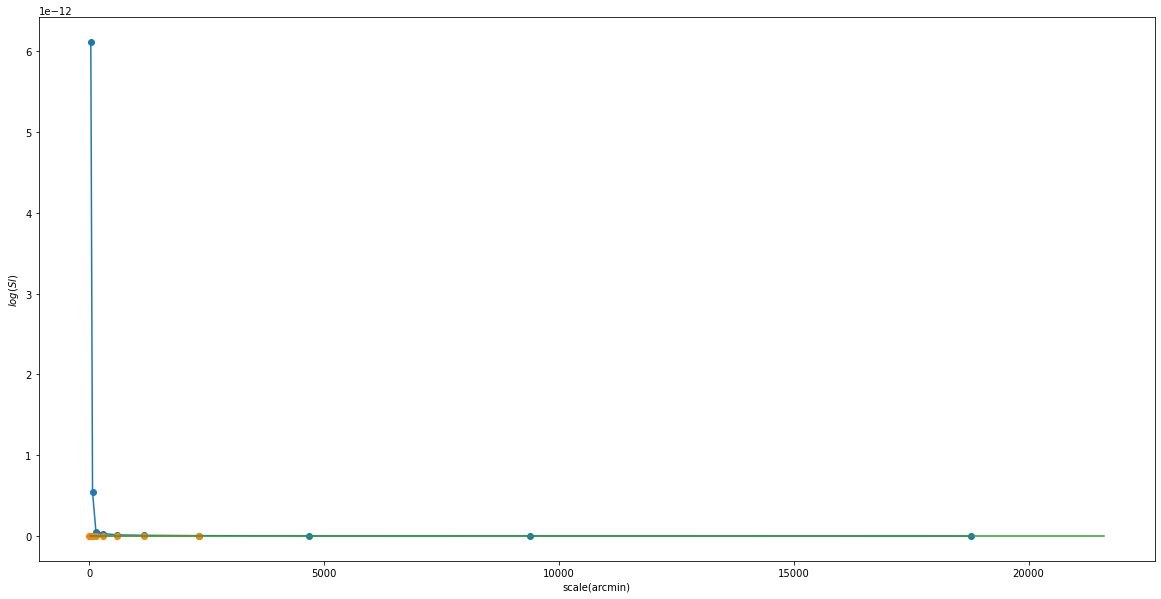

In [254]:
plt.figure(figsize=(20,10))
#plt.plot (scale,s1_sz,'o-')
#plt.plot (scale,s1_sz_out,'o-')
plt.plot (scale_0256,s1_monopole_0256,'o-')
plt.plot (scale_2048,s1_monopole_2048,'o-')
plt.plot (ellsc_0256 ,dl_monopole)
#plt.legend(["SZ map", "Regenerated SZ map","SZ Power"])
plt.xlabel("scale(arcmin)")
plt.ylabel("$log(Sl)$")

In [250]:
%%time 
s1_dipole_0256 , i1_dipole_0256 = ST.compS1 (map_dipole , mor_l_0256,  jmax, nside_0256 )

0
1
2
3
4
5
6
7
8
9
CPU times: user 2.48 s, sys: 111 ms, total: 2.59 s
Wall time: 772 ms


In [251]:
%%time 
s1_dipole_2048 , i1_dipole_2048 = ST.compS1 (map_dipole_2048 , mor_l_2048,  jmax, nside_2048 )

0
1
2
3
4
5
6
7
8
9
CPU times: user 12min 38s, sys: 11.2 s, total: 12min 49s
Wall time: 3min 40s


Text(0, 0.5, '$Sl$')

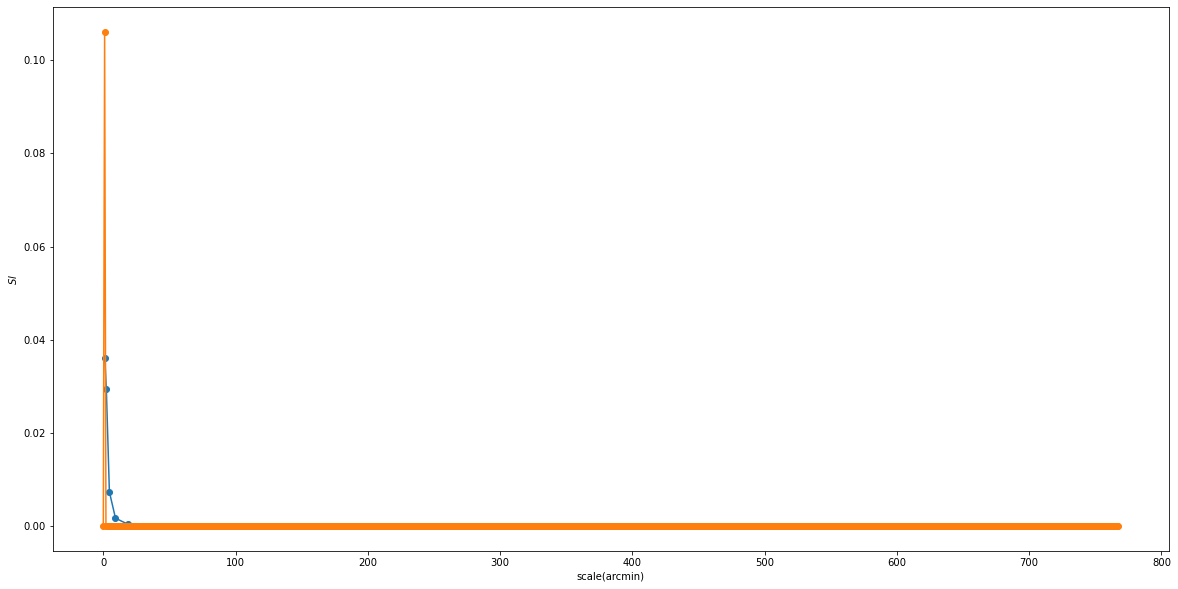

In [325]:
plt.figure(figsize=(20,10))
#plt.plot (scale,s1_sz,'o-')
#plt.plot (scale,s1_sz_out,'o-')
plt.plot (ell_f_0256,s1_dipole_0256,'o-')
#plt.plot (scale_2048,s1_dipole_2048,'o-')
plt.plot (ell_0256 ,dl_dipole , 'o-')
#plt.legend(["SZ map", "Regenerated SZ map","SZ Power"])
plt.xlabel("scale(arcmin)")
plt.ylabel("$Sl$")

In [323]:
mor_l_0256[0]

array([-9.53714042e-18,  1.63421735e-06,  4.90268294e-06,  9.80545853e-06,
        1.63426367e-05,  2.45143411e-05,  3.43207258e-05,  4.57619760e-05,
        5.88383076e-05,  7.35499669e-05,  8.98972313e-05,  1.07880409e-04,
        1.27499837e-04,  1.48755885e-04,  1.71648952e-04,  1.96179467e-04,
        2.22347890e-04,  2.50154711e-04,  2.79600449e-04,  3.10685653e-04,
        3.43410904e-04,  3.77776809e-04,  4.13784008e-04,  4.51433168e-04,
        4.90724986e-04,  5.31660188e-04,  5.74239529e-04,  6.18463793e-04,
        6.64333792e-04,  7.11850367e-04,  7.61014387e-04,  8.11826748e-04,
        8.64288375e-04,  9.18400221e-04,  9.74163266e-04,  1.03157852e-03,
        1.09064701e-03,  1.15136979e-03,  1.21374797e-03,  1.27778265e-03,
        1.34347497e-03,  1.41082609e-03,  1.47983721e-03,  1.55050955e-03,
        1.62284433e-03,  1.69684284e-03,  1.77250636e-03,  1.84983620e-03,
        1.92883371e-03,  2.00950024e-03,  2.09183718e-03,  2.17584594e-03,
        2.26152794e-03,  

In [183]:
s2_dipole , i2_dipole = ST.compS2 (i1_dipole_0256 , mor_l_0256, jmax, nside_0256 )

0
1
2
3
4
5
6
7
8
9


In [ ]:
s2_dipole_2048 , i2_dipole_2048 = ST.compS2 (i1_dipole_2048 , mor_l_2048, jmax, nside_2048 )

In [ ]:
s2_monopole_2048 , i2_monopole_2048 = ST.compS2 (i1_monopole_2048 , mor_l_2048, jmax, nside_2048 )

In [238]:
s2_monopole_0256 , i2_monopole_0256 = ST.compS2 (i1_monopole_0256 , mor_l_0256, jmax, nside_0256 )

0
1
2
3
4
5
6
7
8
9


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


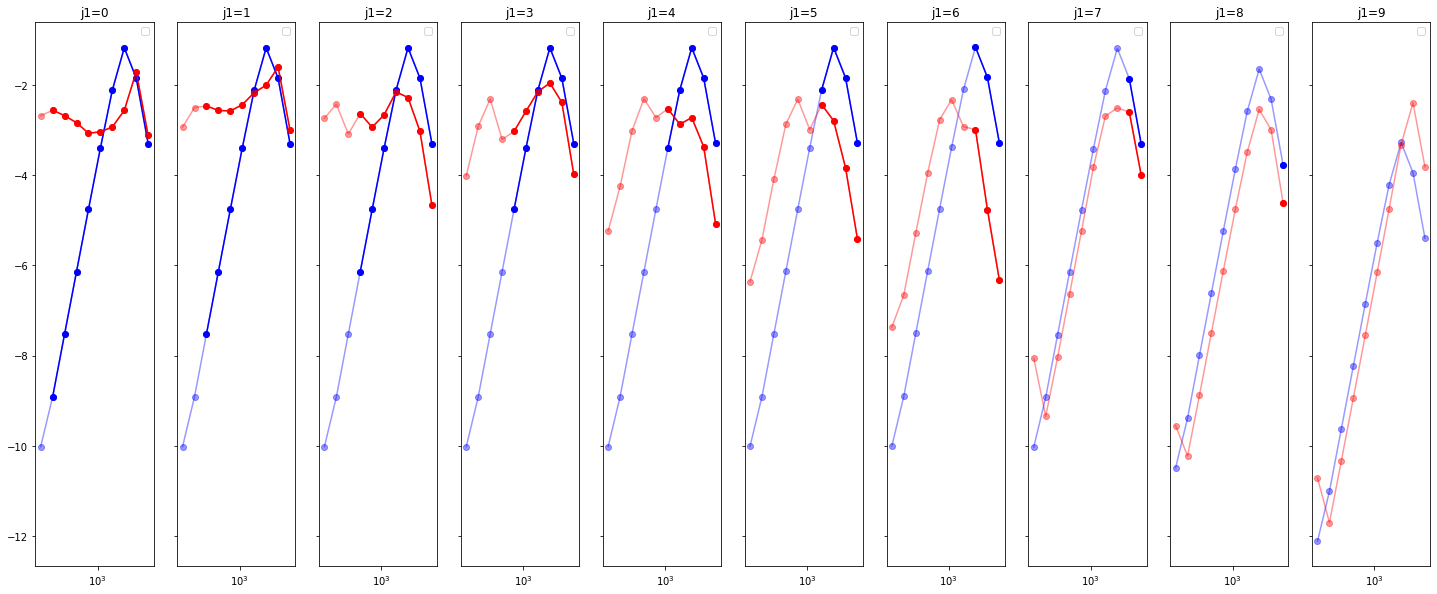

In [256]:
fig, ax = plt.subplots(1, jmax,sharey=True,squeeze=True,figsize=(25,10))
for j in range (0,jmax):
    j = int (j)
    ax[j].plot (scale_0256[j+1:],np.log(s2_dipole[j,j+1:]/s1_dipole_0256[j]),'o-' , alpha =1 , color = "blue")
    ax[j].plot (scale_0256[j+1:],np.log(s2_monopole_0256[j,j+1:]/s1_monopole_0256[j]),'o-' , alpha = 1 , color = "red")
    ax[j].plot (scale_0256,np.log(s2_dipole[j,:]/s1_dipole_0256[j]),'o-' , alpha = 0.4 , color = "blue")
    ax[j].plot (scale_0256,np.log(s2_monopole_0256[j,:]/s1_monopole_0256[j]),'o-' , alpha =0.4 , color = "red")
    ax[j].set_title("j1=%d"%j)
    ax[j].set_xscale('log')
    ax[j].legend()
#fig.legend(['non-Gaussian map' ,'Gaussian map'])
#fig.suptitle("S2 coefficients for SZ map nside=2048")

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


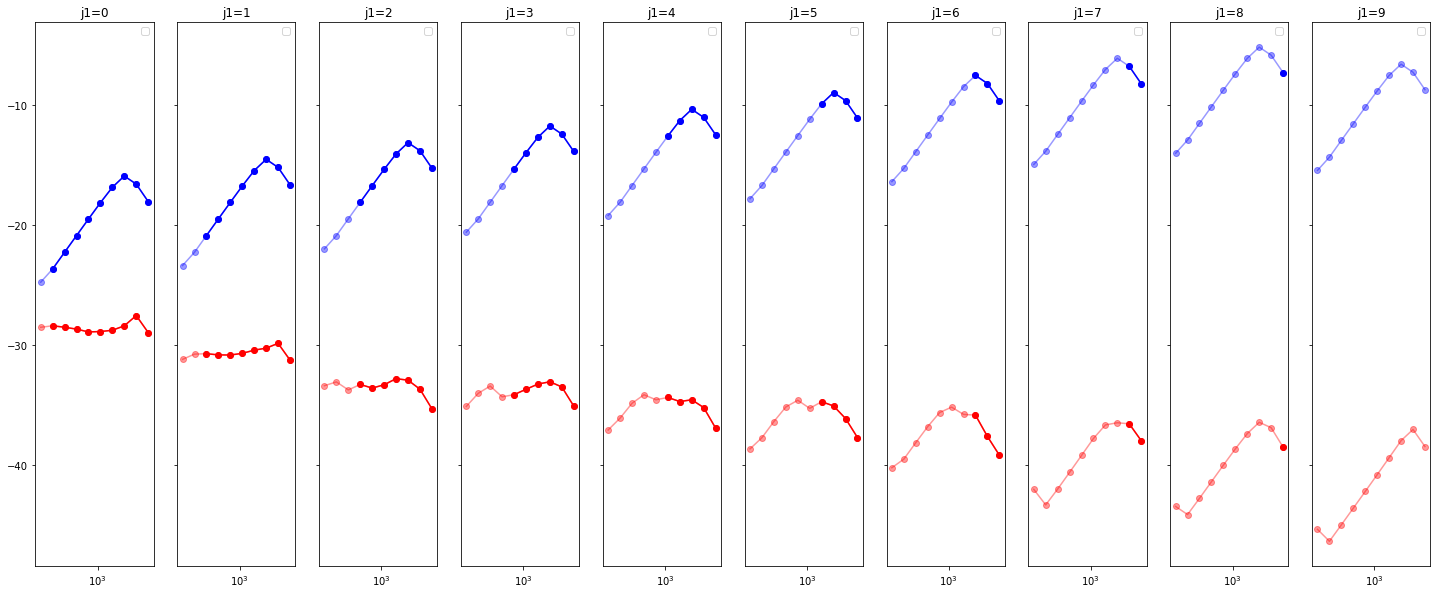

In [276]:
fig, ax = plt.subplots(1, jmax,sharey=True,squeeze=True,figsize=(25,10))
for j in range (0,jmax):
    j = int (j)
    ax[j].plot (scale_0256[j+1:],np.log(s2_dipole[j,j+1:]),'o-' , alpha =1 , color = "blue")
    ax[j].plot (scale_0256[j+1:],np.log(s2_monopole_0256[j,j+1:]),'o-' , alpha = 1 , color = "red")
    ax[j].plot (scale_0256,np.log(s2_dipole[j,:]),'o-' , alpha = 0.4 , color = "blue")
    ax[j].plot (scale_0256,np.log(s2_monopole_0256[j,:]),'o-' , alpha =0.4 , color = "red")
    ax[j].set_title("j1=%d"%j)
    ax[j].set_xscale('log')
    ax[j].legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


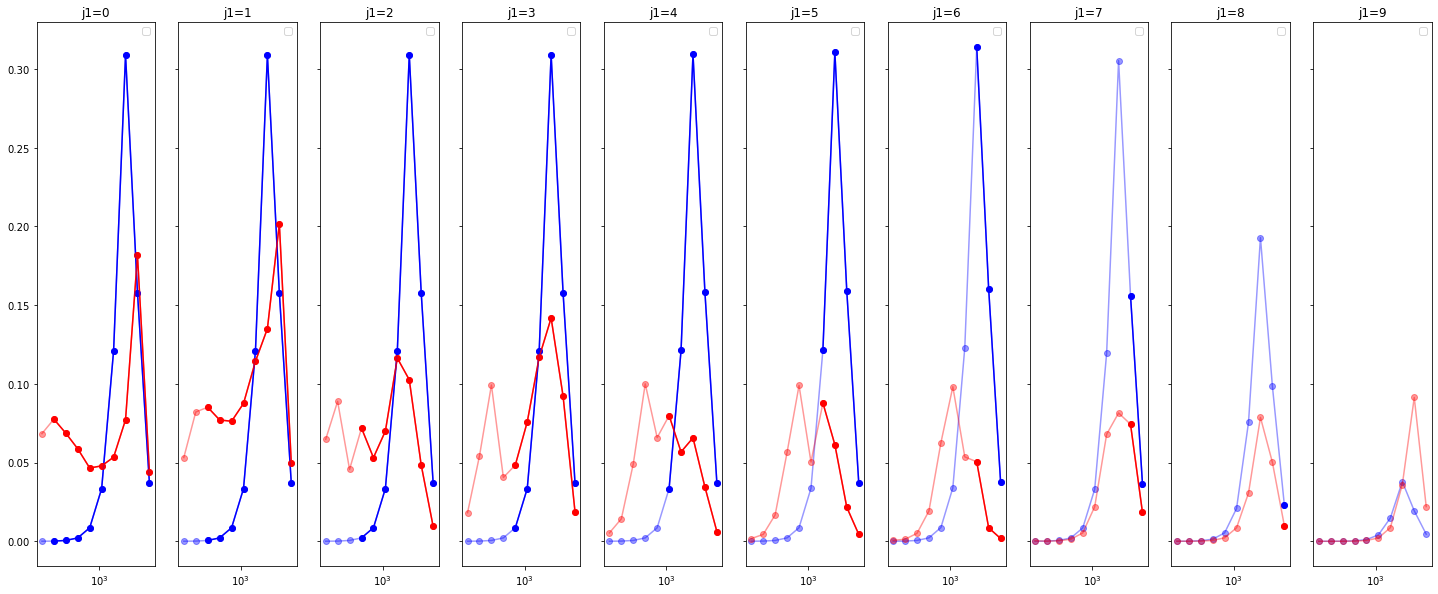

In [275]:
fig, ax = plt.subplots(1, jmax,sharey=True,squeeze=True,figsize=(25,10))
for j in range (0,jmax):
    j = int (j)
    ax[j].plot (scale_0256[j+1:],s2_dipole[j,j+1:]/s1_dipole_0256[j],'o-' , alpha =1 , color = "blue")
    ax[j].plot (scale_0256[j+1:],s2_monopole_0256[j,j+1:]/s1_monopole_0256[j],'o-' , alpha = 1 , color = "red")
    ax[j].plot (scale_0256,s2_dipole[j,:]/s1_dipole_0256[j],'o-' , alpha = 0.4 , color = "blue")
    ax[j].plot (scale_0256,s2_monopole_0256[j,:]/s1_monopole_0256[j],'o-' , alpha =0.4 , color = "red")
    ax[j].set_title("j1=%d"%j)
    ax[j].set_xscale('log')
    ax[j].legend()
#fig.legend(['non-Gaussian map' ,'Gaussian map'])
#fig.suptitle("S2 coefficients for SZ map nside=2048")

In [334]:
def compS1 (hmap, mor_l, jmax, nside , gaus_l = None , lmax = None , resol = None):

    if lmax == None :
        lmax = 3 * nside 
    
    if resol==None :
        resol = hp.nside2resol(nside, arcmin =False )
        
    
    S1=np.zeros((jmax))
    i1=[]
    
    mapalm=hp.map2alm(hmap,lmax,use_pixel_weights=True)
    print (mapalm)
    print ()
    
    #mor_l = morlet_arr(resol, jmax, lmax, jbin)
    #gaus_l = gaus_arr(resol, jmax, jbin)
    
    for j in range(jmax):
        print(j)
        #sigma = (0.8*resol*2**j) # multiplied by resolution in radians
        #freq=(3.0*np.pi) /(4.0*resol*2**j) #divided by resolution in radians

        #morlet filter 
        
        morl = mor_l[j]
        
        #convolving the map with filter 1

        nalm=hp.almxfl(mapalm,morl)
        print (nalm)
        I1=hp.alm2map(nalm,nside,lmax)
        print (I1)

        #modulus
        I1=np.abs(I1)

        i1.append(I1)
        #Gaussian filter for S1
        
        
        
        if gaus_l == None:
            
            S1map = I1
            
        else:
        
            gausl = gaus_l[j]
            #Convolving with gaussian filter to get S1
            I1alm=hp.map2alm(I1, lmax, use_pixel_weights=True)
            
            nI1alm=hp.almxfl(I1alm, gausl)
        
            S1map=hp.alm2map(nI1alm, nside, lmax)
        
    
        #Averaging the entire map
        S1[j]=np.mean(S1map)
        
    return S1 , i1

def compS2 ( i1 , mor_l , jmax  , nside , gaus_l = None , lmax = None , resol = None ):

    if lmax == None :
        lmax = 3 * nside 
    
    if resol==None :
        resol = hp.nside2resol(nside, arcmin =False )
        
       
    S2=np.zeros((jmax,jmax))
    i2 = []

    for j1 in range(jmax):
        print (j1)
        I1=i1[j1]
        mapalm1=hp.map2alm(I1, lmax ,use_pixel_weights=True)
        i2_tmp = []
        for j2 in range (jmax):
                    
            sigma2 = (0.8*resol*2**j2)
            freq2=(3.0*np.pi) /(4.0*resol*2**j2)
            
            #filter 2        
            f2=mor_l[j2]
            
            #Convolving I1 with filter 2
            
            nalm2=hp.almxfl(mapalm1,f2)
            print (nalm2)
            I2=hp.alm2map(nalm2,nside,lmax)
            print (I2)
            
            #modulus
            I2=np.abs(I2)
            i2_tmp.append (I2)
            
            if gaus_l == None:
            
                S2map = I2
            
            else:
            
                #Gaussian filter to get S2
                gausl2=gaus_l[j2]
            
                #Convolving with gaussian filter to get S2
                I2alm=hp.map2alm(I2,lmax ,use_pixel_weights=True)
                nI2alm=hp.almxfl(I2alm,gausl2)
                S2map=hp.alm2map(nI2alm, nside,lmax)     
                               
            #averaging the entire map
            S2[j1][j2]=np.mean(S2map)
    
        i2.append(i2_tmp)
    
    return S2 , i2

def compS3 ( i2  , mor_l, jmax , nside , gaus_l = None , lmax = None , resol = None):

    if lmax == None :
        lmax = 3 * nside -1
        
    if resol==None :
        resol = hp.nside2resol(nside, arcmin =False )
        
    
    S3 = np.zeros((jmax,jmax,jmax ))
    
    
    for j1 in range(jmax):
        
        for j2 in range (j1+1 , jmax):
            
            print (j1 , j2)
            I2=i2[j1][j2]
            mapalm2=hp.map2alm(I2, lmax ,use_pixel_weights=True)
            print (mapalm2)
            for j3 in range (jmax):
                    
                #sigma3 = (0.8*resol*2**j3)
                #freq3 =(3.0*np.pi) /(4.0*resol*2**j3)
            
                #filter 3       
                f3=mor_l[j3]
            
                #Convolving I2 with filter 3
                
                nalm3 = hp.almxfl (mapalm2 , f3)
                I3 = hp.alm2map(nalm3 , nside , lmax)
                
                #modulus
                I3=np.abs(I3)
                
                print (I3)
                if gaus_l == None:
            
                    S3map = I3
            
                else:

                    #Gaussian filter to get S2
                    gausl3 = gaus_l[j3]
                
                    #Convolving with gaussian filter to get S3
                    I3alm = hp.map2alm (I3 , lmax , use_pixel_weights=True)
                    nI3alm = hp.almxfl(I3alm , gausl3 )
                    S3map = hp.alm2map(nI3alm, nside,lmax)     
                           
                #averaging the entire map
                S3[j1 , j2 , j3] = np.mean(S3map)
    
    return S3 

In [326]:
s1_monopole_0256 , i1_monopole_0256 = compS1 (map_monopole , mor_l_0256 , jmax , nside_0256)

[1.00000000e+02+0.00000000e+00j 1.38100080e-17+0.00000000e+00j
 2.84217094e-14+0.00000000e+00j ... 0.00000000e+00+0.00000000e+00j
 0.00000000e+00+0.00000000e+00j 8.28451604e-17-4.12078904e-28j]

0
[-9.53714042e-16+0.j  2.25685546e-23+0.j  1.39342630e-19+0.j ...
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
[-3.90324564e-11 -3.90321884e-11 -3.90319508e-11 ... -3.90326275e-11
 -3.90323898e-11 -3.90328122e-11]
1
[-2.72482184e-15+0.j  9.07099007e-23+0.j  5.60070909e-19+0.j ...
  0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
[-7.83342839e-12 -7.83340337e-12 -7.83341492e-12 ... -7.83341019e-12
 -7.83342174e-12 -7.83342931e-12]
2
[-2.59778060e-15+0.j  3.63313264e-22+0.j  2.24337460e-18+0.j ...
 -0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
[6.97046822e-12 6.97040016e-12 6.97036078e-12 ... 6.97040028e-12
 6.97036090e-12 6.97041157e-12]
3
[-5.91070303e-15+0.j  1.45435366e-21+0.j  8.98294296e-18+0.j ...
 -0.00000000e+00+0.j  0.00000000e+00+0.j  0.0000

In [328]:
s2_monopole_0256 , i2_monopole_0256 = compS2 (i2_monopole_0256 , mor_l_0256 , jmax , nside_0256)

0
[-2.06623954e-28+0.00000000e+00j -5.20872646e-24+0.00000000e+00j
  1.00734386e-16+0.00000000e+00j ...  2.80275735e-20+7.10882726e-21j
  0.00000000e+00+0.00000000e+00j -0.00000000e+00+0.00000000e+00j]
[-2.04316321e-12 -2.04317205e-12 -2.04325096e-12 ... -2.04306622e-12
 -2.04314510e-12 -2.04302197e-12]
[-5.90337813e-28+0.00000000e+00j -2.09354594e-23+0.00000000e+00j
  4.04889726e-16+0.00000000e+00j ...  4.43386821e-22+1.12459265e-22j
  0.00000000e+00+0.00000000e+00j -0.00000000e+00+0.00000000e+00j]
[-2.55012452e-12 -2.55017766e-12 -2.55018611e-12 ... -2.55045636e-12
 -2.55046481e-12 -2.55042333e-12]
[-5.62814089e-28+0.00000000e+00j -8.38511568e-23+0.00000000e+00j
  1.62179344e-15+0.00000000e+00j ... -7.39155644e-24-1.87477157e-24j
  0.00000000e+00+0.00000000e+00j -0.00000000e+00+0.00000000e+00j]
[4.46658003e-12 4.46656860e-12 4.46656219e-12 ... 4.46634590e-12
 4.46633949e-12 4.46634316e-12]
[-1.28056501e-27+0.00000000e+00j -3.35658641e-22+0.00000000e+00j
  6.49400147e-15+0.00000000e+0

[-9.81390634e-16 -9.81393386e-16 -9.81399193e-16 ... -9.82950030e-16
 -9.82955838e-16 -9.82953141e-16]
[ 5.77331122e-30+0.00000000e+00j -5.66864267e-19+0.00000000e+00j
 -1.93488393e-15+0.00000000e+00j ... -3.77898736e-33+3.32027347e-32j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
[-1.15306372e-15 -1.15306499e-15 -1.15306545e-15 ... -1.15250330e-15
 -1.15250376e-15 -1.15250249e-15]
3
[-1.06726872e-30+0.00000000e+00j -4.14272574e-24+0.00000000e+00j
 -2.18190305e-19+0.00000000e+00j ... -7.12472454e-26+7.39796178e-25j
 -0.00000000e+00+0.00000000e+00j -0.00000000e+00+0.00000000e+00j]
[3.99978874e-14 4.00088112e-14 4.00114368e-14 ... 4.00069280e-14
 4.00095536e-14 3.99998488e-14]
[-3.04925479e-30+0.00000000e+00j -1.66508776e-23+0.00000000e+00j
 -8.76989638e-19+0.00000000e+00j ... -1.12710755e-27+1.17033276e-26j
 -0.00000000e+00+0.00000000e+00j -0.00000000e+00+0.00000000e+00j]
[1.51296354e-13 1.51297065e-13 1.51297235e-13 ... 1.51297061e-13
 1.51297231e-13 1.51296549e-13

[6.02600092e-15 6.02600482e-15 6.02598965e-15 ... 6.02600456e-15
 6.02598938e-15 6.02598508e-15]
[-1.40127327e-30+0.00000000e+00j -9.08435715e-20+0.00000000e+00j
  7.44129940e-16+0.00000000e+00j ... -2.38952878e-35+2.84832569e-34j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
[1.15305291e-15 1.15305889e-15 1.15306275e-15 ... 1.15271640e-15
 1.15272026e-15 1.15271433e-15]
[ 1.12570907e-30+0.00000000e+00j -1.11588625e-19+0.00000000e+00j
  1.79517927e-16+0.00000000e+00j ... -5.74758004e-36+6.85113318e-35j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
[1.33073357e-16 1.33074392e-16 1.33075164e-16 ... 1.33184911e-16
 1.33185683e-16 1.33184650e-16]
6
[-1.86550117e-31+0.00000000e+00j -1.54969548e-24+0.00000000e+00j
  3.77216332e-21+0.00000000e+00j ... -1.84122496e-25-5.74832151e-26j
  0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
[2.34332750e-17 2.38345419e-17 2.35269785e-17 ... 2.38611100e-17
 2.35464051e-17 2.40657411e-17]
[-5.329855

[1.34196832e-16 1.34194262e-16 1.34194220e-16 ... 1.34408029e-16
 1.34407986e-16 1.34410557e-16]
[ 4.44045420e-31+0.00000000e+00j -1.38881997e-19+0.00000000e+00j
 -1.29555373e-16+0.00000000e+00j ...  1.27601919e-41-3.89337187e-41j
 -0.00000000e+00+0.00000000e+00j -0.00000000e+00+0.00000000e+00j]
[5.69283425e-16 5.69289190e-16 5.69292886e-16 ... 5.70235865e-16
 5.70239565e-16 5.70233876e-16]
[-2.81423303e-31+0.00000000e+00j -5.56086805e-19+0.00000000e+00j
 -3.27785613e-16+0.00000000e+00j ...  3.09148789e-42-9.43270454e-42j
 -0.00000000e+00+0.00000000e+00j -0.00000000e+00+0.00000000e+00j]
[-3.91733592e-17 -3.91729693e-17 -3.91724454e-17 ... -3.92153587e-17
 -3.92148372e-17 -3.92152303e-17]
[ 2.26080645e-31+0.00000000e+00j -6.83074884e-19+0.00000000e+00j
 -7.90767724e-17+0.00000000e+00j ...  7.43601594e-43-2.26886677e-42j
 -0.00000000e+00+0.00000000e+00j -0.00000000e+00+0.00000000e+00j]
[-4.72763539e-17 -4.72772643e-17 -4.72773754e-17 ... -4.66081623e-17
 -4.66082738e-17 -4.66073646e-17]


In [335]:
s3_monopole = compS3 (i2_monopole_0256 , mor_l_0256 , jmax , nside_0256)

0 1
[ 1.68089352e-12+0.00000000e+00j -8.04081697e-19+0.00000000e+00j
  1.65932102e-12+0.00000000e+00j ...  4.34503776e-21+1.29560216e-20j
  1.53459661e-21+1.30487171e-21j  1.51300590e-20-1.03370500e-20j]
[4.73048530e-14 4.72868440e-14 4.72894942e-14 ... 4.72951925e-14
 4.72978497e-14 4.73027039e-14]
[6.72089467e-14 6.72096488e-14 6.72084289e-14 ... 6.71227975e-14
 6.71215777e-14 6.71227266e-14]
[2.00410817e-13 2.00410277e-13 2.00409360e-13 ... 2.00415034e-13
 2.00414116e-13 2.00415565e-13]
[2.20202731e-13 2.20202735e-13 2.20203361e-13 ... 2.20174904e-13
 2.20175531e-13 2.20175262e-13]
[4.42216818e-14 4.42215359e-14 4.42212808e-14 ... 4.42282807e-14
 4.42280256e-14 4.42281373e-14]
[7.72494958e-14 7.72495598e-14 7.72496328e-14 ... 7.72459815e-14
 7.72460544e-14 7.72459741e-14]
[5.06907527e-14 5.06907289e-14 5.06907249e-14 ... 5.06901076e-14
 5.06901035e-14 5.06901283e-14]
[1.53144177e-13 1.53144185e-13 1.53144187e-13 ... 1.53144234e-13
 1.53144235e-13 1.53144227e-13]
[2.54516308e-13 2.54

[ 3.93400970e-12+0.00000000e+00j  1.57526792e-18+0.00000000e+00j
  1.18431334e-12+0.00000000e+00j ...  2.12989499e-27+3.45142032e-28j
 -1.48536362e-28+5.69106394e-29j  1.73521041e-27+4.40668239e-28j]
[3.37523351e-17 3.37527243e-17 3.37548452e-17 ... 3.37520291e-17
 3.37541425e-17 3.37509529e-17]
[7.28379334e-17 7.28379392e-17 7.28379732e-17 ... 7.28378279e-17
 7.28378618e-17 7.28378108e-17]
[2.90545879e-16 2.90545876e-16 2.90545875e-16 ... 2.90545449e-16
 2.90545447e-16 2.90545450e-16]
[1.16387943e-15 1.16387943e-15 1.16387942e-15 ... 1.16387770e-15
 1.16387769e-15 1.16387770e-15]
[4.67386978e-15 4.67386974e-15 4.67386972e-15 ... 4.67386281e-15
 4.67386279e-15 4.67386283e-15]
[1.89536033e-14 1.89536032e-14 1.89536031e-14 ... 1.89535751e-14
 1.89535751e-14 1.89535752e-14]
[7.86932807e-14 7.86932800e-14 7.86932797e-14 ... 7.86931618e-14
 7.86931615e-14 7.86931621e-14]
[3.55620064e-13 3.55620061e-13 3.55620060e-13 ... 3.55619439e-13
 3.55619437e-13 3.55619440e-13]
[2.98246447e-13 2.982464

[1.12233338e-16 1.12233333e-16 1.12233328e-16 ... 1.12233341e-16
 1.12233336e-16 1.12233340e-16]
[4.50724995e-16 4.50724975e-16 4.50724949e-16 ... 4.50724993e-16
 4.50724967e-16 4.50724987e-16]
[1.82279886e-15 1.82279878e-15 1.82279868e-15 ... 1.82279884e-15
 1.82279874e-15 1.82279882e-15]
[7.49260903e-15 7.49260870e-15 7.49260827e-15 ... 7.49260885e-15
 7.49260841e-15 7.49260875e-15]
[3.07803487e-14 3.07803483e-14 3.07803468e-14 ... 3.07803515e-14
 3.07803500e-14 3.07803504e-14]
[5.33368711e-14 5.33368713e-14 5.33368725e-14 ... 5.33368674e-14
 5.33368686e-14 5.33368685e-14]
[3.00018971e-14 3.00018976e-14 3.00018984e-14 ... 3.00019335e-14
 3.00019342e-14 3.00019337e-14]
[6.27598379e-15 6.27598390e-15 6.27598402e-15 ... 6.27598230e-15
 6.27598242e-15 6.27598231e-15]
1 8
[ 3.89317908e-13+0.00000000e+00j  2.15024144e-19+0.00000000e+00j
  1.46817838e-13+0.00000000e+00j ...  1.40572663e-29+3.00682623e-29j
  7.94501276e-32+3.70220333e-32j -2.36184418e-30+1.93190277e-29j]
[5.00877279e-18 5.00

[8.98741685e-17 8.98747107e-17 8.98748801e-17 ... 8.98726279e-17
 8.98727973e-17 8.98722507e-17]
[3.70869671e-16 3.70871908e-16 3.70872609e-16 ... 3.70862716e-16
 3.70863416e-16 3.70861160e-16]
[1.07169166e-15 1.07170023e-15 1.07170223e-15 ... 1.07164756e-15
 1.07164956e-15 1.07164092e-15]
[7.04892802e-16 7.04901689e-16 7.04900793e-16 ... 7.04958441e-16
 7.04957545e-16 7.04948543e-16]
[1.12223258e-15 1.12223105e-15 1.12223194e-15 ... 1.12228245e-15
 1.12228334e-15 1.12228488e-15]
[3.06553938e-16 3.06553656e-16 3.06553769e-16 ... 3.06487217e-16
 3.06487330e-16 3.06487613e-16]
2 8
[ 8.55251377e-15+0.00000000e+00j -2.58428079e-19+0.00000000e+00j
 -4.04505145e-16+0.00000000e+00j ...  1.27318532e-31+2.24627746e-31j
  1.54888481e-32+3.56447614e-32j -1.51697774e-32+1.36988692e-31j]
[8.02509381e-20 8.22703561e-20 8.05198104e-20 ... 8.25320537e-20
 8.06815943e-20 8.14884212e-20]
[1.48299462e-19 1.48331557e-19 1.48303862e-19 ... 1.48283248e-19
 1.48254004e-19 1.48266667e-19]
[6.23112825e-19 6.23

[4.39903369e-17 4.39902854e-17 4.39902973e-17 ... 4.39812556e-17
 4.39812675e-17 4.39813193e-17]
[1.84329142e-16 1.84328927e-16 1.84328977e-16 ... 1.84290586e-16
 1.84290636e-16 1.84290852e-16]
[3.55020416e-16 3.55019473e-16 3.55019652e-16 ... 3.54801778e-16
 3.54801957e-16 3.54802903e-16]
[1.07018086e-16 1.07019273e-16 1.07019165e-16 ... 1.07104966e-16
 1.07104858e-16 1.07103670e-16]
[1.85013905e-18 1.84997895e-18 1.85000301e-18 ... 1.82242358e-18
 1.82244763e-18 1.82260780e-18]
3 9
[ 2.09333493e-15+0.00000000e+00j  2.44582043e-19+0.00000000e+00j
  5.18881190e-16+0.00000000e+00j ... -5.54307854e-33-9.05009629e-33j
  6.62093680e-35+2.02795670e-34j  1.15059344e-33-1.08599017e-32j]
[5.75035216e-21 3.18930975e-21 3.24916520e-21 ... 3.24942221e-21
 3.30927615e-21 5.85509539e-21]
[2.61282270e-21 2.57270109e-21 2.57365120e-21 ... 2.57122939e-21
 2.57217948e-21 2.61204789e-21]
[1.30509141e-20 1.30516102e-20 1.30516225e-20 ... 1.30420700e-20
 1.30420823e-20 1.30413871e-20]
[1.10917887e-19 1.10

[1.09806739e-15 1.09805957e-15 1.09805972e-15 ... 1.09809890e-15
 1.09809905e-15 1.09810694e-15]
[4.86298831e-16 4.86294194e-16 4.86294814e-16 ... 4.86047648e-16
 4.86048268e-16 4.86052917e-16]
[8.36485024e-17 8.36482587e-17 8.36483949e-17 ... 8.37509187e-17
 8.37510550e-17 8.37512993e-17]
5 7
[ 2.11293736e-15+0.00000000e+00j -2.56561822e-19+0.00000000e+00j
  1.27876939e-15+0.00000000e+00j ...  9.12959553e-34+1.74771199e-33j
 -4.53496966e-34-2.67796975e-34j  4.57270149e-35+7.64205618e-34j]
[4.76942975e-19 4.99558458e-19 4.84247240e-19 ... 5.00357989e-19
 4.84725142e-19 4.70802789e-19]
[9.64515277e-19 9.64876843e-19 9.64625498e-19 ... 9.64877763e-19
 9.64621548e-19 9.64415726e-19]
[3.85159915e-18 3.85158516e-18 3.85158060e-18 ... 3.85153935e-18
 3.85153488e-18 3.85154621e-18]
[1.54867916e-17 1.54867575e-17 1.54867241e-17 ... 1.54865752e-17
 1.54865418e-17 1.54865737e-17]
[6.30020406e-17 6.30019048e-17 6.30017657e-17 ... 6.30011747e-17
 6.30010356e-17 6.30011649e-17]
[2.60384041e-16 2.60

[7.47363429e-18 7.47364890e-18 7.47367390e-18 ... 7.58136395e-18
 7.58138889e-18 7.58137437e-18]
7 9
[ 1.17776272e-16+0.00000000e+00j  4.37632415e-20+0.00000000e+00j
  3.28820916e-17+0.00000000e+00j ... -1.95537277e-36-2.21908896e-35j
  1.78563155e-35-1.12404608e-35j -5.58435108e-36-1.12865011e-35j]
[7.97005594e-22 1.09948856e-21 1.40573573e-21 ... 1.07270069e-21
 1.44495704e-21 7.76077686e-22]
[1.96255361e-21 1.96716432e-21 1.97194951e-21 ... 1.96661176e-21
 1.97242301e-21 1.96203515e-21]
[7.84134206e-21 7.84142057e-21 7.84134580e-21 ... 7.84092828e-21
 7.84083609e-21 7.84085414e-21]
[3.14114368e-20 3.14120523e-20 3.14120563e-20 ... 3.14100601e-20
 3.14100596e-20 3.14094679e-20]
[1.26201067e-19 1.26203628e-19 1.26203719e-19 ... 1.26195715e-19
 1.26195805e-19 1.26193248e-19]
[5.11545114e-19 5.11555717e-19 5.11556110e-19 ... 5.11525141e-19
 5.11525535e-19 5.11514927e-19]
[2.08504031e-18 2.08508404e-18 2.08508628e-18 ... 2.08498167e-18
 2.08498391e-18 2.08494016e-18]
[9.51999258e-18 9.52